<a href="https://colab.research.google.com/github/siva-sankar-a/erav1/blob/main/session_9_cifar_10_200k_85/Session_9_CIFAR10_C1C2C3C40.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# ERA V1 Session 9
## Refer [link](https://github.com/siva-sankar-a/erav1/tree/session/session-6-multiple-architecture-check/session_6_multiple_architectures_mnist#readme) for further documentation

## Cloning the Github repository
## [Session 9](https://github.com/siva-sankar-a/erav1.git)

In [1]:
!pip install torchviz

  Preparing metadata (setup.py) ... done
  Created wheel for torchviz: filename=torchviz-0.0.2-py3-none-any.whl size=4131 sha256=08e51d36d93417eeccf9d3f6ac563bf0ecc59d556433b0270b4a6f9972172730
  Stored in directory: /root/.cache/pip/wheels/4c/97/88/a02973217949e0db0c9f4346d154085f4725f99c4f15a87094
Successfully built torchviz


In [23]:
!git clone https://github.com/siva-sankar-a/erav1.git

Cloning into 'erav1'...
remote: Enumerating objects: 270, done.
remote: Counting objects: 100% (130/130), done.
remote: Compressing objects: 100% (114/114), done.
remote: Total 270 (delta 66), reused 37 (delta 15), pack-reused 140
Receiving objects: 100% (270/270), 1.20 MiB | 16.82 MiB/s, done.
Resolving deltas: 100% (137/137), done.


In [24]:
%cd /content/erav1

/content/erav1


In [25]:
!git pull

Already up to date.


## Adding the session folder to path in order to access the functions defined

In [26]:
%load_ext autoreload
%autoreload 2

The autoreload extension is already loaded. To reload it, use:
  %reload_ext autoreload


In [27]:
import os
import sys

In [28]:
sys.path.append('/content/erav1/session_9_cifar_10_200k_85')

In [29]:
import importlib

In [30]:
import utils as U
import datasets as ds
import transforms as tf

In [13]:
U = importlib.reload(U)
ds = importlib.reload(ds)
tf = importlib.reload(tf)

## Get device

In [31]:
device = U.get_device()
print(device)

CUDA Available? True
cuda


In [32]:
import pandas as pd
import albumentations as A
from albumentations.pytorch import ToTensorV2

In [33]:
pd.options.plotting.backend = "plotly"

## Get train and test transforms

In [34]:
train_transforms = tf.get_train_transforms()
test_transforms = tf.get_test_transforms()

In [35]:
train_transforms = A.Compose(
    [
        A.HorizontalFlip(p=0.5),
        A.ShiftScaleRotate(shift_limit=0.05, scale_limit=0.10, rotate_limit=25, p=0.5),
        A.CoarseDropout(max_holes=3, max_height=20, max_width=20, min_holes=1, min_height=4, min_width=4,
                        fill_value=(0.4913997551666284, 0.48215855929893703, 0.446530913373161),
                        mask_fill_value=None, always_apply=False, p=0.5),
        A.Normalize(mean=(0.4913997551666284, 0.48215855929893703, 0.446530913373161),
                    std=(0.24703225141799082, 0.24348516474564, 0.26158783926049628)),
        ToTensorV2(),
    ]
)


test_transforms = A.Compose(
    [
        A.Normalize(mean=(0.4913997551666284, 0.48215855929893703, 0.446530913373161),
                    std=(0.24703225141799082, 0.24348516474564, 0.26158783926049628)),
        ToTensorV2(),
    ]
)

In [36]:
from torchvision import datasets, transforms
import numpy as np

In [37]:
from torch.utils.data import WeightedRandomSampler

In [38]:
class CIFAR10_Dataset(datasets.CIFAR10):
    def __init__(self, root="./data/", train=True, download=True, transform=None):
        super().__init__(root=root, train=train, download=download, transform=transform)

    def __getitem__(self, index):
        image, label = self.data[index], self.targets[index]

        if self.transform is not None:
            transformed = self.transform(image=image)
            image = transformed["image"]

        return image, label

## Get dataset

In [39]:
train_dataset = CIFAR10_Dataset('../data', train=True, download=True, transform=train_transforms)
test_dataset = CIFAR10_Dataset('../data', train=False, download=True, transform=test_transforms)

100%|██████████| 170498071/170498071 [00:12<00:00, 13159612.98it/s]


Extracting ../data/cifar-10-python.tar.gz to ../data
Files already downloaded and verified


## Get train and test dataloader

In [40]:
import torch

In [41]:
labels = {0: 'airplane',
          1: 'automobile',
          2: 'bird',
          3: 'cat',
          4: 'deer',
          5: 'dog',
          6: 'frog',
          7: 'horse',
          8: 'ship',
          9: 'truck'}

In [42]:
label_weights = { 0: 1.0, 1: 1.0, 2: 1.0, 3: 1.0, 4: 1.0, 5: 1.0, 6: 1.0, 7: 1.0, 8: 1.0, 9: 1.0}

In [43]:
_weights = [label_weights[label] for label in train_dataset.targets]

In [44]:
batch_size = 64
sampler = torch.utils.data.sampler.WeightedRandomSampler(_weights, len(train_dataset), replacement=False)

In [45]:
kwargs = {'batch_size': batch_size, 'shuffle': False, 'num_workers': 2, 'pin_memory': True}

train_dataloader = ds.get_train_dataloader(train_dataset, sampler=sampler, **kwargs)
test_dataloader = ds.get_test_dataloader(test_dataset, **kwargs)

## Display image grid

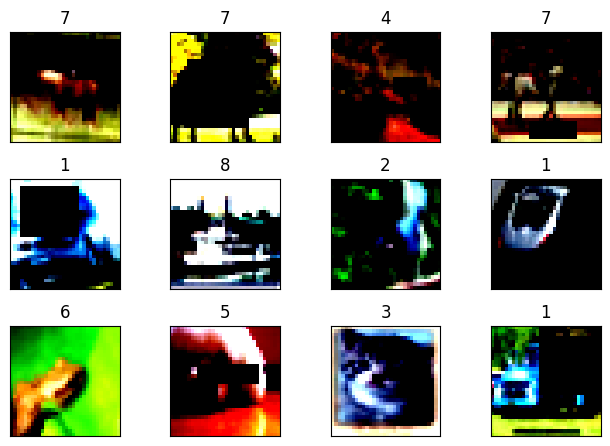

In [408]:
U.show_image_grid(train_dataloader)

In [344]:
!git clone https://github.com/Fangyh09/pytorch-receptive-field.git

fatal: destination path 'pytorch-receptive-field' already exists and is not an empty directory.


In [400]:
sys.path.append('/content/erav1/pytorch-receptive-field')

In [ ]:
from torch_receptive_field import receptive_field

In [47]:
import torch.nn as nn
from torchviz import make_dot
import torch.nn.functional as F

C1C2C3C40

In [48]:
class Net(nn.Module):

    '''
    This class implements the neural network model

    Usage:
    >>> device = ...
    >>> model = Net().to('cpu')
    '''

    #This defines the structure of the NN.
    def __init__(self):
        super(Net, self).__init__()

        # C1
        self.conv1 = self.conv_block_3x3(3, 32)
        self.downsample1 = self.conv3x3_bn_dropout(3, 32, padding=1, stride=2)

        # C2
        self.conv2 = self.conv_block_3x3(32, 32, depthwise_seperable=True)
        self.downsample2 = self.conv3x3_bn_dropout(32, 32, padding=1, stride=2)

        #C3
        self.conv3 = self.conv_block_3x3(32, 32)
        self.downsample3 = self.conv3x3_bn_dropout(32, 32, padding=1, stride=2)

        #C4
        self.conv4 = self.conv_block_3x3(32, 64, pool=False)
        self.downsample4 = self.conv3x3_bn_dropout(32, 64, padding=1)

        self.gap = nn.AvgPool2d(4)
        self.mixer = nn.Sequential(
            self.conv1x1(64, 10),
        )

    def conv_block_3x3(self, in_channels, out_channels, pool=True, depthwise_seperable=False):
        if pool:
            return nn.Sequential(
                self.conv3x3_bn_dropout(in_channels, out_channels, padding=1),
                self.conv3x3_bn_dropout(out_channels, out_channels, padding=1, groups=(out_channels if depthwise_seperable else 1)), # Depthwise seperable convolution
                self.conv3x3_bn_dropout(out_channels, out_channels, dilation=2, padding=2, stride=2) # Dilated convlution
            )
        else:
            return nn.Sequential(
                self.conv3x3_bn_dropout(in_channels, out_channels, padding=1),
                self.conv3x3_bn_dropout(out_channels, out_channels, padding=1),
                self.conv3x3_bn_dropout(out_channels, out_channels, padding=1)
        )

    def conv3x3_bn_dropout(self, in_channels, out_channels, kernel_size=3, stride=1, padding=0, dilation=1, groups=1, bias=False, dropout=0.0):
          if dropout:
            return nn.Sequential(
                self.conv3x3(in_channels, out_channels, kernel_size, stride, padding, dilation, groups, bias),
                nn.ReLU(),
                nn.BatchNorm2d(out_channels),
                nn.Dropout(dropout),
                )
          else:
            return nn.Sequential(
                self.conv3x3(in_channels, out_channels, kernel_size, stride, padding, dilation, groups, bias),
                nn.ReLU(),
                 nn.BatchNorm2d(out_channels),
                )

    def conv3x3(self, in_channels, out_channels, kernel_size=3, stride=1, padding=0, dilation=1, groups=1, bias=False):
          return nn.Conv2d(in_channels,
                    out_channels,
                    kernel_size=kernel_size,
                    stride=stride,
                    padding=padding,
                    dilation=dilation,
                    groups=groups,
                    bias=bias)

    def conv1x1(self, in_channels, out_channels, kernel_size=1, stride=1, padding=0, bias=False):
          return nn.Conv2d(in_channels,
                    out_channels,
                    kernel_size=kernel_size,
                    stride=stride,
                    padding=padding,
                    bias=bias)


    def forward(self, x):

        # Block 1
        i1 = x
        x = self.conv1(x)
        i1 = self.downsample1(i1)
        x = x + i1

        # Block 2
        i2 = x
        x = self.conv2(x)
        i2 = self.downsample2(i2)
        x = x + i2

        # Block 3
        i3 = x
        x = self.conv3(x)
        i3 = self.downsample3(i3)
        x = x + i3

        # Block 4
        i4 = x
        x = self.conv4(x)
        i4 = self.downsample4(i4)
        x = x + i4

        x = self.gap(x)
        x = self.mixer(x)
        x = x.view(-1, 10)

        return F.log_softmax(x, dim=1)

        # return x

## Generate model summary

In [49]:
from torchsummary import summary

In [50]:
model = Net().to('cpu')
summary(model, input_size=(3, 32, 32), batch_size=batch_size, device='cpu')

----------------------------------------------------------------
        Layer (type)               Output Shape         Param #
            Conv2d-1           [64, 32, 32, 32]             864
              ReLU-2           [64, 32, 32, 32]               0
       BatchNorm2d-3           [64, 32, 32, 32]              64
            Conv2d-4           [64, 32, 32, 32]           9,216
              ReLU-5           [64, 32, 32, 32]               0
       BatchNorm2d-6           [64, 32, 32, 32]              64
            Conv2d-7           [64, 32, 16, 16]           9,216
              ReLU-8           [64, 32, 16, 16]               0
       BatchNorm2d-9           [64, 32, 16, 16]              64
           Conv2d-10           [64, 32, 16, 16]             864
             ReLU-11           [64, 32, 16, 16]               0
      BatchNorm2d-12           [64, 32, 16, 16]              64
           Conv2d-13           [64, 32, 16, 16]           9,216
             ReLU-14           [64, 32,

In [411]:
receptive_field(model.cpu(), input_size=(3, 32, 32), device='cpu')

------------------------------------------------------------------------------
        Layer (type)    map size      start       jump receptive_field 
        0               [32, 32]        0.5        1.0             1.0 
        1               [32, 32]        0.5        1.0             3.0 
        2               [32, 32]        0.5        1.0             3.0 
        3               [32, 32]        0.5        1.0             3.0 
        4               [32, 32]        0.5        1.0             5.0 
        5               [32, 32]        0.5        1.0             5.0 
        6               [32, 32]        0.5        1.0             5.0 
        7               [16, 16]       -0.5        2.0             9.0 
        8               [16, 16]       -0.5        2.0             9.0 
        9               [16, 16]       -0.5        2.0             9.0 
        10              [16, 16]       -0.5        4.0            13.0 
        11              [16, 16]       -0.5        4.0   

OrderedDict([('0',
              OrderedDict([('j', 1.0),
                           ('r', 1.0),
                           ('start', 0.5),
                           ('conv_stage', True),
                           ('output_shape', [-1, 3, 32, 32])])),
             ('1',
              OrderedDict([('j', 1.0),
                           ('r', 3.0),
                           ('start', 0.5),
                           ('input_shape', [-1, 3, 32, 32]),
                           ('output_shape', [-1, 32, 32, 32])])),
             ('2',
              OrderedDict([('j', 1.0),
                           ('r', 3.0),
                           ('start', 0.5),
                           ('input_shape', [-1, 32, 32, 32]),
                           ('output_shape', [-1, 32, 32, 32])])),
             ('3',
              OrderedDict([('j', 1.0),
                           ('r', 3.0),
                           ('start', 0.5),
                           ('input_shape', [-1, 32, 32, 32]),
         

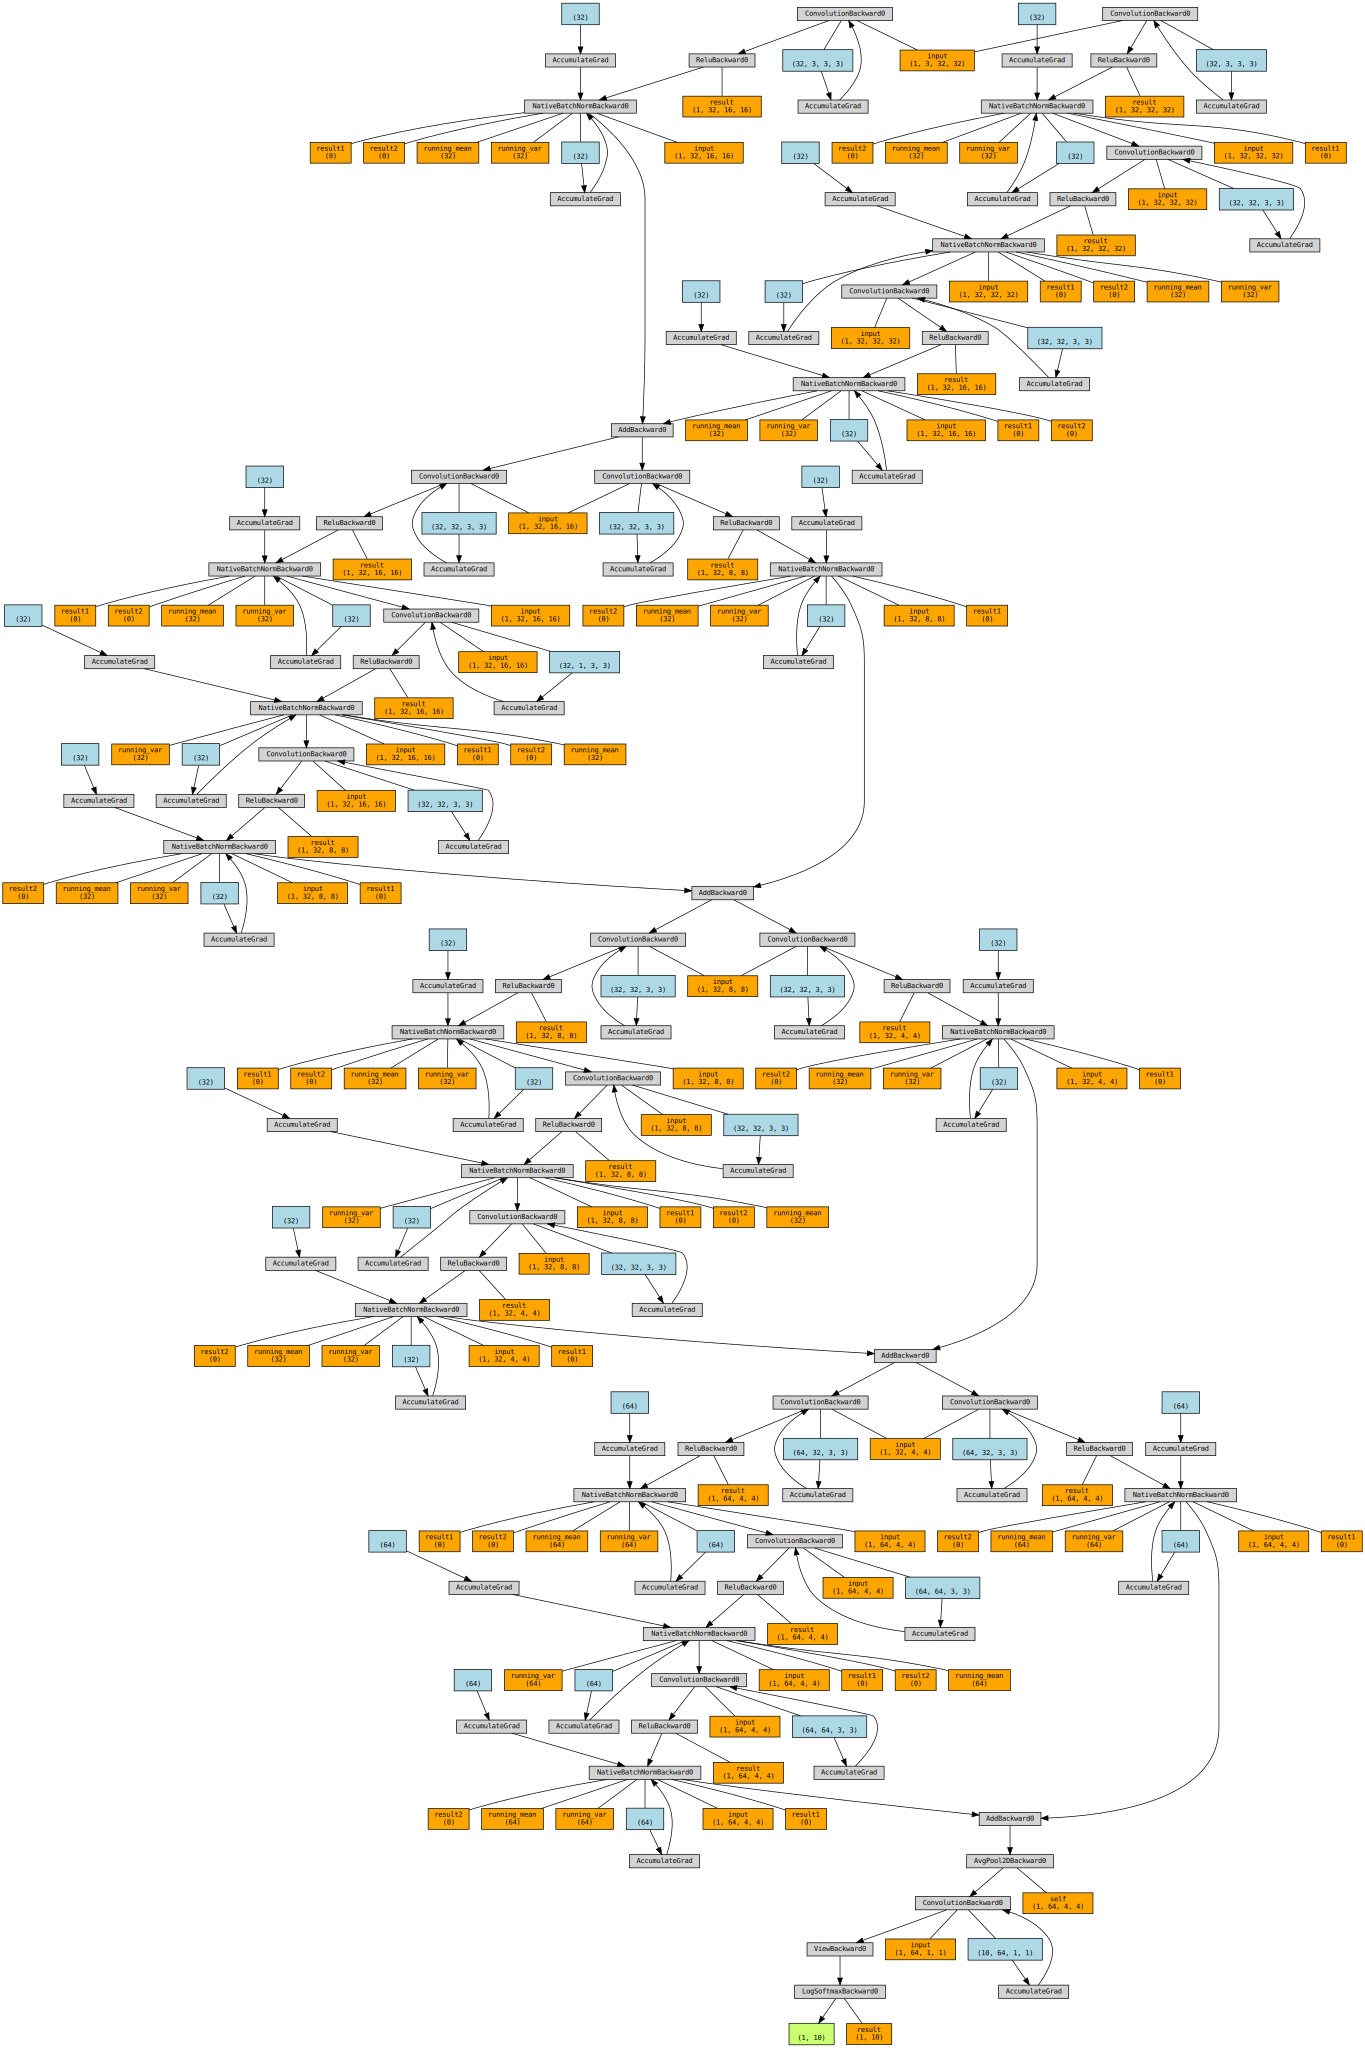

In [51]:
random_input = torch.randn(1, 3, 32, 32)
model.eval()
y = model(random_input)
dot_graph = make_dot(y, show_attrs=False, show_saved=True)
dot_graph.format = 'svg'
dot_graph.render(f'net')
dot_graph

## Training

In [427]:
model = Net().to(device)

In [428]:
import torch.optim as optim

In [429]:
labels = {0: 'airplane',
          1: 'automobile',
          2: 'bird',
          3: 'cat',
          4: 'deer',
          5: 'dog',
          6: 'frog',
          7: 'horse',
          8: 'ship',
          9: 'truck'}

In [430]:
num_epochs = 35
momentum = 0.9
max_lr = 0.1
regularization = None
epochs_up = 7
base_momentum = 0.85
div_factor = 1e6

steps_per_epoch = len(train_dataloader)
total_steps = num_epochs * steps_per_epoch
pct_start = epochs_up / num_epochs

In [431]:
optimizer = optim.SGD(model.parameters(), lr=0.1, momentum=0.99)
# scheduler = optim.lr_scheduler.StepLR(optimizer, step_size=6, gamma=0.1, verbose=True)
scheduler = optim.lr_scheduler.OneCycleLR(optimizer,
                                          max_lr=max_lr,
                                          total_steps=total_steps,
                                          epochs=num_epochs,
                                          steps_per_epoch=steps_per_epoch,
                                          pct_start=pct_start,
                                          anneal_strategy='linear',
                                          cycle_momentum=True,
                                          base_momentum=base_momentum,
                                          max_momentum=momentum,
                                          div_factor=div_factor,
                                          verbose=False)

In [432]:
metrics = { 'train_acc': [], 'train_losses': [],
            'test_acc': [], 'test_losses': [] }

for epoch in range(1, num_epochs + 1):
    print(f'Epoch {epoch}')
    U.train(model, device, train_dataloader, optimizer, metrics, scheduler)
    U.test(model, device, test_dataloader, metrics, labels, get_misclassified=(epoch == num_epochs))
    # break
    # scheduler.step()

Epoch 1


Train: Loss=1.4691 Batch_id=781 Accuracy=36.10: 100%|██████████| 782/782 [00:17<00:00, 44.83it/s]


              precision    recall  f1-score   support

    airplane       0.59      0.37      0.45      1000
  automobile       0.48      0.72      0.58      1000
        bird       0.50      0.20      0.28      1000
         cat       0.36      0.23      0.28      1000
        deer       0.49      0.30      0.37      1000
         dog       0.44      0.40      0.42      1000
        frog       0.52      0.61      0.56      1000
       horse       0.42      0.68      0.52      1000
        ship       0.51      0.60      0.55      1000
       truck       0.46      0.63      0.53      1000

    accuracy                           0.47     10000
   macro avg       0.48      0.47      0.45     10000
weighted avg       0.48      0.47      0.45     10000

Test set: Average loss: 1.5279, Accuracy: 4726/10000 (47.26%)

Epoch 2


Train: Loss=1.3390 Batch_id=781 Accuracy=49.36: 100%|██████████| 782/782 [00:16<00:00, 46.93it/s]


              precision    recall  f1-score   support

    airplane       0.68      0.56      0.61      1000
  automobile       0.75      0.74      0.75      1000
        bird       0.46      0.48      0.47      1000
         cat       0.42      0.29      0.34      1000
        deer       0.64      0.38      0.48      1000
         dog       0.45      0.61      0.52      1000
        frog       0.64      0.74      0.69      1000
       horse       0.70      0.63      0.66      1000
        ship       0.59      0.83      0.69      1000
       truck       0.66      0.69      0.68      1000

    accuracy                           0.60     10000
   macro avg       0.60      0.60      0.59     10000
weighted avg       0.60      0.60      0.59     10000

Test set: Average loss: 1.1265, Accuracy: 5960/10000 (59.60%)

Epoch 3


Train: Loss=1.2015 Batch_id=781 Accuracy=56.29: 100%|██████████| 782/782 [00:17<00:00, 45.84it/s]


              precision    recall  f1-score   support

    airplane       0.75      0.61      0.67      1000
  automobile       0.75      0.82      0.78      1000
        bird       0.58      0.51      0.55      1000
         cat       0.50      0.43      0.47      1000
        deer       0.59      0.58      0.59      1000
         dog       0.61      0.45      0.52      1000
        frog       0.75      0.71      0.73      1000
       horse       0.64      0.77      0.70      1000
        ship       0.65      0.87      0.75      1000
       truck       0.69      0.77      0.73      1000

    accuracy                           0.65     10000
   macro avg       0.65      0.65      0.65     10000
weighted avg       0.65      0.65      0.65     10000

Test set: Average loss: 0.9954, Accuracy: 6536/10000 (65.36%)

Epoch 4


Train: Loss=1.0561 Batch_id=781 Accuracy=60.23: 100%|██████████| 782/782 [00:17<00:00, 45.78it/s]


              precision    recall  f1-score   support

    airplane       0.72      0.73      0.72      1000
  automobile       0.79      0.85      0.82      1000
        bird       0.59      0.58      0.58      1000
         cat       0.51      0.46      0.48      1000
        deer       0.71      0.56      0.62      1000
         dog       0.60      0.58      0.59      1000
        frog       0.69      0.80      0.74      1000
       horse       0.74      0.75      0.75      1000
        ship       0.70      0.89      0.78      1000
       truck       0.85      0.70      0.76      1000

    accuracy                           0.69     10000
   macro avg       0.69      0.69      0.69     10000
weighted avg       0.69      0.69      0.69     10000

Test set: Average loss: 0.8947, Accuracy: 6889/10000 (68.89%)

Epoch 5


Train: Loss=1.1307 Batch_id=781 Accuracy=63.27: 100%|██████████| 782/782 [00:17<00:00, 45.42it/s]


              precision    recall  f1-score   support

    airplane       0.75      0.78      0.77      1000
  automobile       0.82      0.81      0.81      1000
        bird       0.69      0.54      0.60      1000
         cat       0.49      0.59      0.54      1000
        deer       0.74      0.59      0.65      1000
         dog       0.67      0.56      0.61      1000
        frog       0.75      0.77      0.76      1000
       horse       0.78      0.77      0.77      1000
        ship       0.87      0.78      0.82      1000
       truck       0.62      0.90      0.73      1000

    accuracy                           0.71     10000
   macro avg       0.72      0.71      0.71     10000
weighted avg       0.72      0.71      0.71     10000

Test set: Average loss: 0.8298, Accuracy: 7082/10000 (70.82%)

Epoch 6


Train: Loss=0.6230 Batch_id=781 Accuracy=65.16: 100%|██████████| 782/782 [00:18<00:00, 43.19it/s]


              precision    recall  f1-score   support

    airplane       0.75      0.76      0.75      1000
  automobile       0.79      0.90      0.84      1000
        bird       0.56      0.62      0.59      1000
         cat       0.61      0.45      0.52      1000
        deer       0.77      0.60      0.68      1000
         dog       0.71      0.52      0.60      1000
        frog       0.62      0.91      0.74      1000
       horse       0.86      0.71      0.78      1000
        ship       0.76      0.90      0.82      1000
       truck       0.79      0.77      0.78      1000

    accuracy                           0.72     10000
   macro avg       0.72      0.72      0.71     10000
weighted avg       0.72      0.72      0.71     10000

Test set: Average loss: 0.8204, Accuracy: 7157/10000 (71.57%)

Epoch 7


Train: Loss=1.0345 Batch_id=781 Accuracy=66.74: 100%|██████████| 782/782 [00:16<00:00, 46.34it/s]


              precision    recall  f1-score   support

    airplane       0.77      0.79      0.78      1000
  automobile       0.81      0.89      0.85      1000
        bird       0.73      0.60      0.66      1000
         cat       0.54      0.60      0.57      1000
        deer       0.63      0.77      0.70      1000
         dog       0.67      0.58      0.62      1000
        frog       0.79      0.82      0.81      1000
       horse       0.85      0.75      0.79      1000
        ship       0.85      0.82      0.84      1000
       truck       0.83      0.80      0.81      1000

    accuracy                           0.74     10000
   macro avg       0.75      0.74      0.74     10000
weighted avg       0.75      0.74      0.74     10000

Test set: Average loss: 0.7382, Accuracy: 7426/10000 (74.26%)

Epoch 8


Train: Loss=1.0829 Batch_id=781 Accuracy=68.36: 100%|██████████| 782/782 [00:17<00:00, 43.94it/s]


              precision    recall  f1-score   support

    airplane       0.82      0.74      0.78      1000
  automobile       0.87      0.91      0.89      1000
        bird       0.61      0.74      0.67      1000
         cat       0.65      0.49      0.56      1000
        deer       0.71      0.71      0.71      1000
         dog       0.72      0.62      0.67      1000
        frog       0.77      0.86      0.81      1000
       horse       0.79      0.82      0.80      1000
        ship       0.85      0.88      0.86      1000
       truck       0.85      0.85      0.85      1000

    accuracy                           0.76     10000
   macro avg       0.76      0.76      0.76     10000
weighted avg       0.76      0.76      0.76     10000

Test set: Average loss: 0.6875, Accuracy: 7631/10000 (76.31%)

Epoch 9


Train: Loss=1.0399 Batch_id=781 Accuracy=69.77: 100%|██████████| 782/782 [00:16<00:00, 46.54it/s]


              precision    recall  f1-score   support

    airplane       0.78      0.76      0.77      1000
  automobile       0.88      0.90      0.89      1000
        bird       0.66      0.75      0.71      1000
         cat       0.66      0.57      0.61      1000
        deer       0.73      0.78      0.76      1000
         dog       0.78      0.56      0.66      1000
        frog       0.78      0.85      0.82      1000
       horse       0.81      0.82      0.82      1000
        ship       0.82      0.90      0.86      1000
       truck       0.84      0.87      0.86      1000

    accuracy                           0.78     10000
   macro avg       0.78      0.78      0.77     10000
weighted avg       0.78      0.78      0.77     10000

Test set: Average loss: 0.6445, Accuracy: 7771/10000 (77.71%)

Epoch 10


Train: Loss=0.8126 Batch_id=781 Accuracy=71.18: 100%|██████████| 782/782 [00:17<00:00, 44.64it/s]


              precision    recall  f1-score   support

    airplane       0.76      0.87      0.81      1000
  automobile       0.92      0.84      0.88      1000
        bird       0.77      0.65      0.71      1000
         cat       0.64      0.58      0.61      1000
        deer       0.77      0.77      0.77      1000
         dog       0.74      0.63      0.68      1000
        frog       0.71      0.91      0.80      1000
       horse       0.84      0.85      0.84      1000
        ship       0.88      0.87      0.88      1000
       truck       0.83      0.89      0.86      1000

    accuracy                           0.79     10000
   macro avg       0.79      0.79      0.78     10000
weighted avg       0.79      0.79      0.78     10000

Test set: Average loss: 0.6301, Accuracy: 7859/10000 (78.59%)

Epoch 11


Train: Loss=0.5716 Batch_id=781 Accuracy=71.82: 100%|██████████| 782/782 [00:16<00:00, 46.50it/s]


              precision    recall  f1-score   support

    airplane       0.79      0.82      0.80      1000
  automobile       0.89      0.91      0.90      1000
        bird       0.84      0.59      0.69      1000
         cat       0.66      0.54      0.59      1000
        deer       0.78      0.78      0.78      1000
         dog       0.65      0.76      0.70      1000
        frog       0.83      0.86      0.85      1000
       horse       0.85      0.83      0.84      1000
        ship       0.80      0.93      0.86      1000
       truck       0.81      0.88      0.84      1000

    accuracy                           0.79     10000
   macro avg       0.79      0.79      0.79     10000
weighted avg       0.79      0.79      0.79     10000

Test set: Average loss: 0.6265, Accuracy: 7886/10000 (78.86%)

Epoch 12


Train: Loss=0.8462 Batch_id=781 Accuracy=72.69: 100%|██████████| 782/782 [00:17<00:00, 45.90it/s]


              precision    recall  f1-score   support

    airplane       0.78      0.85      0.81      1000
  automobile       0.89      0.89      0.89      1000
        bird       0.76      0.69      0.72      1000
         cat       0.69      0.56      0.62      1000
        deer       0.75      0.81      0.78      1000
         dog       0.75      0.66      0.70      1000
        frog       0.80      0.90      0.84      1000
       horse       0.81      0.85      0.83      1000
        ship       0.90      0.86      0.88      1000
       truck       0.81      0.90      0.85      1000

    accuracy                           0.80     10000
   macro avg       0.79      0.80      0.79     10000
weighted avg       0.79      0.80      0.79     10000

Test set: Average loss: 0.5898, Accuracy: 7967/10000 (79.67%)

Epoch 13


Train: Loss=1.5475 Batch_id=781 Accuracy=73.39: 100%|██████████| 782/782 [00:17<00:00, 45.30it/s]


              precision    recall  f1-score   support

    airplane       0.79      0.86      0.82      1000
  automobile       0.90      0.88      0.89      1000
        bird       0.84      0.64      0.73      1000
         cat       0.70      0.54      0.61      1000
        deer       0.76      0.82      0.79      1000
         dog       0.68      0.76      0.72      1000
        frog       0.82      0.87      0.85      1000
       horse       0.81      0.87      0.84      1000
        ship       0.91      0.86      0.88      1000
       truck       0.81      0.91      0.86      1000

    accuracy                           0.80     10000
   macro avg       0.80      0.80      0.80     10000
weighted avg       0.80      0.80      0.80     10000

Test set: Average loss: 0.5815, Accuracy: 8016/10000 (80.16%)

Epoch 14


Train: Loss=0.6619 Batch_id=781 Accuracy=74.38: 100%|██████████| 782/782 [00:16<00:00, 46.37it/s]


              precision    recall  f1-score   support

    airplane       0.79      0.83      0.81      1000
  automobile       0.91      0.91      0.91      1000
        bird       0.83      0.65      0.73      1000
         cat       0.67      0.63      0.65      1000
        deer       0.81      0.77      0.79      1000
         dog       0.71      0.74      0.72      1000
        frog       0.85      0.86      0.86      1000
       horse       0.80      0.89      0.84      1000
        ship       0.89      0.90      0.89      1000
       truck       0.81      0.91      0.86      1000

    accuracy                           0.81     10000
   macro avg       0.81      0.81      0.81     10000
weighted avg       0.81      0.81      0.81     10000

Test set: Average loss: 0.5641, Accuracy: 8075/10000 (80.75%)

Epoch 15


Train: Loss=0.9672 Batch_id=781 Accuracy=74.84: 100%|██████████| 782/782 [00:18<00:00, 41.27it/s]


              precision    recall  f1-score   support

    airplane       0.83      0.84      0.84      1000
  automobile       0.91      0.90      0.91      1000
        bird       0.78      0.73      0.76      1000
         cat       0.70      0.60      0.64      1000
        deer       0.76      0.82      0.79      1000
         dog       0.77      0.67      0.72      1000
        frog       0.87      0.85      0.86      1000
       horse       0.75      0.93      0.83      1000
        ship       0.90      0.91      0.90      1000
       truck       0.85      0.90      0.88      1000

    accuracy                           0.81     10000
   macro avg       0.81      0.81      0.81     10000
weighted avg       0.81      0.81      0.81     10000

Test set: Average loss: 0.5474, Accuracy: 8138/10000 (81.38%)

Epoch 16


Train: Loss=0.8491 Batch_id=781 Accuracy=75.46: 100%|██████████| 782/782 [00:16<00:00, 46.45it/s]


              precision    recall  f1-score   support

    airplane       0.79      0.89      0.84      1000
  automobile       0.91      0.91      0.91      1000
        bird       0.79      0.71      0.75      1000
         cat       0.71      0.59      0.64      1000
        deer       0.77      0.85      0.81      1000
         dog       0.76      0.69      0.72      1000
        frog       0.81      0.89      0.85      1000
       horse       0.83      0.88      0.85      1000
        ship       0.90      0.89      0.90      1000
       truck       0.90      0.86      0.88      1000

    accuracy                           0.82     10000
   macro avg       0.82      0.82      0.82     10000
weighted avg       0.82      0.82      0.82     10000

Test set: Average loss: 0.5340, Accuracy: 8183/10000 (81.83%)

Epoch 17


Train: Loss=0.5507 Batch_id=781 Accuracy=76.13: 100%|██████████| 782/782 [00:18<00:00, 43.29it/s]


              precision    recall  f1-score   support

    airplane       0.81      0.83      0.82      1000
  automobile       0.92      0.90      0.91      1000
        bird       0.81      0.67      0.73      1000
         cat       0.67      0.62      0.64      1000
        deer       0.76      0.83      0.80      1000
         dog       0.69      0.73      0.71      1000
        frog       0.82      0.89      0.86      1000
       horse       0.87      0.84      0.86      1000
        ship       0.92      0.86      0.89      1000
       truck       0.83      0.91      0.87      1000

    accuracy                           0.81     10000
   macro avg       0.81      0.81      0.81     10000
weighted avg       0.81      0.81      0.81     10000

Test set: Average loss: 0.5441, Accuracy: 8093/10000 (80.93%)

Epoch 18


Train: Loss=0.5131 Batch_id=781 Accuracy=76.60: 100%|██████████| 782/782 [00:16<00:00, 46.71it/s]


              precision    recall  f1-score   support

    airplane       0.84      0.83      0.83      1000
  automobile       0.89      0.93      0.91      1000
        bird       0.68      0.83      0.75      1000
         cat       0.65      0.68      0.66      1000
        deer       0.83      0.80      0.81      1000
         dog       0.80      0.64      0.71      1000
        frog       0.85      0.88      0.86      1000
       horse       0.90      0.84      0.86      1000
        ship       0.92      0.90      0.91      1000
       truck       0.89      0.89      0.89      1000

    accuracy                           0.82     10000
   macro avg       0.82      0.82      0.82     10000
weighted avg       0.82      0.82      0.82     10000

Test set: Average loss: 0.5264, Accuracy: 8203/10000 (82.03%)

Epoch 19


Train: Loss=0.4672 Batch_id=781 Accuracy=77.03: 100%|██████████| 782/782 [00:17<00:00, 45.47it/s]


              precision    recall  f1-score   support

    airplane       0.82      0.86      0.84      1000
  automobile       0.94      0.90      0.92      1000
        bird       0.76      0.79      0.77      1000
         cat       0.68      0.66      0.67      1000
        deer       0.84      0.79      0.81      1000
         dog       0.80      0.69      0.74      1000
        frog       0.83      0.88      0.86      1000
       horse       0.87      0.86      0.87      1000
        ship       0.88      0.93      0.90      1000
       truck       0.86      0.91      0.88      1000

    accuracy                           0.83     10000
   macro avg       0.83      0.83      0.83     10000
weighted avg       0.83      0.83      0.83     10000

Test set: Average loss: 0.4999, Accuracy: 8268/10000 (82.68%)

Epoch 20


Train: Loss=0.6740 Batch_id=781 Accuracy=77.36: 100%|██████████| 782/782 [00:17<00:00, 45.82it/s]


              precision    recall  f1-score   support

    airplane       0.87      0.81      0.84      1000
  automobile       0.85      0.96      0.90      1000
        bird       0.79      0.76      0.77      1000
         cat       0.70      0.62      0.66      1000
        deer       0.80      0.80      0.80      1000
         dog       0.76      0.72      0.74      1000
        frog       0.81      0.90      0.85      1000
       horse       0.87      0.88      0.87      1000
        ship       0.86      0.94      0.90      1000
       truck       0.90      0.84      0.87      1000

    accuracy                           0.82     10000
   macro avg       0.82      0.82      0.82     10000
weighted avg       0.82      0.82      0.82     10000

Test set: Average loss: 0.5181, Accuracy: 8234/10000 (82.34%)

Epoch 21


Train: Loss=0.4518 Batch_id=781 Accuracy=77.90: 100%|██████████| 782/782 [00:16<00:00, 46.11it/s]


              precision    recall  f1-score   support

    airplane       0.84      0.85      0.84      1000
  automobile       0.91      0.94      0.92      1000
        bird       0.83      0.70      0.76      1000
         cat       0.71      0.62      0.66      1000
        deer       0.84      0.79      0.81      1000
         dog       0.74      0.74      0.74      1000
        frog       0.86      0.88      0.87      1000
       horse       0.77      0.92      0.84      1000
        ship       0.91      0.91      0.91      1000
       truck       0.86      0.92      0.89      1000

    accuracy                           0.83     10000
   macro avg       0.83      0.83      0.83     10000
weighted avg       0.83      0.83      0.83     10000

Test set: Average loss: 0.5107, Accuracy: 8271/10000 (82.71%)

Epoch 22


Train: Loss=0.5182 Batch_id=781 Accuracy=78.37: 100%|██████████| 782/782 [00:17<00:00, 44.09it/s]


              precision    recall  f1-score   support

    airplane       0.77      0.90      0.83      1000
  automobile       0.93      0.92      0.92      1000
        bird       0.82      0.73      0.77      1000
         cat       0.70      0.65      0.67      1000
        deer       0.86      0.78      0.82      1000
         dog       0.73      0.75      0.74      1000
        frog       0.88      0.87      0.88      1000
       horse       0.84      0.90      0.87      1000
        ship       0.91      0.90      0.90      1000
       truck       0.89      0.91      0.90      1000

    accuracy                           0.83     10000
   macro avg       0.83      0.83      0.83     10000
weighted avg       0.83      0.83      0.83     10000

Test set: Average loss: 0.4976, Accuracy: 8308/10000 (83.08%)

Epoch 23


Train: Loss=0.9123 Batch_id=781 Accuracy=78.66: 100%|██████████| 782/782 [00:16<00:00, 46.18it/s]


              precision    recall  f1-score   support

    airplane       0.81      0.90      0.85      1000
  automobile       0.91      0.94      0.92      1000
        bird       0.85      0.70      0.77      1000
         cat       0.67      0.70      0.68      1000
        deer       0.81      0.84      0.82      1000
         dog       0.79      0.71      0.75      1000
        frog       0.83      0.90      0.86      1000
       horse       0.90      0.87      0.88      1000
        ship       0.92      0.91      0.91      1000
       truck       0.88      0.90      0.89      1000

    accuracy                           0.84     10000
   macro avg       0.84      0.84      0.83     10000
weighted avg       0.84      0.84      0.83     10000

Test set: Average loss: 0.4868, Accuracy: 8352/10000 (83.52%)

Epoch 24


Train: Loss=0.6807 Batch_id=781 Accuracy=79.23: 100%|██████████| 782/782 [00:18<00:00, 42.58it/s]


              precision    recall  f1-score   support

    airplane       0.85      0.87      0.86      1000
  automobile       0.91      0.94      0.92      1000
        bird       0.82      0.71      0.76      1000
         cat       0.70      0.66      0.68      1000
        deer       0.80      0.84      0.82      1000
         dog       0.77      0.73      0.75      1000
        frog       0.82      0.90      0.86      1000
       horse       0.87      0.88      0.87      1000
        ship       0.88      0.93      0.90      1000
       truck       0.90      0.89      0.89      1000

    accuracy                           0.83     10000
   macro avg       0.83      0.83      0.83     10000
weighted avg       0.83      0.83      0.83     10000

Test set: Average loss: 0.4876, Accuracy: 8343/10000 (83.43%)

Epoch 25


Train: Loss=1.1794 Batch_id=781 Accuracy=79.43: 100%|██████████| 782/782 [00:18<00:00, 42.66it/s]


              precision    recall  f1-score   support

    airplane       0.83      0.86      0.85      1000
  automobile       0.90      0.95      0.92      1000
        bird       0.75      0.80      0.78      1000
         cat       0.78      0.57      0.66      1000
        deer       0.85      0.82      0.83      1000
         dog       0.74      0.79      0.76      1000
        frog       0.86      0.90      0.88      1000
       horse       0.88      0.88      0.88      1000
        ship       0.93      0.90      0.91      1000
       truck       0.86      0.91      0.88      1000

    accuracy                           0.84     10000
   macro avg       0.84      0.84      0.84     10000
weighted avg       0.84      0.84      0.84     10000

Test set: Average loss: 0.4742, Accuracy: 8373/10000 (83.73%)

Epoch 26


Train: Loss=0.4955 Batch_id=781 Accuracy=79.98: 100%|██████████| 782/782 [00:17<00:00, 44.35it/s]


              precision    recall  f1-score   support

    airplane       0.83      0.87      0.85      1000
  automobile       0.93      0.92      0.93      1000
        bird       0.82      0.76      0.79      1000
         cat       0.69      0.67      0.68      1000
        deer       0.81      0.86      0.83      1000
         dog       0.79      0.73      0.76      1000
        frog       0.85      0.90      0.88      1000
       horse       0.88      0.89      0.89      1000
        ship       0.90      0.91      0.91      1000
       truck       0.90      0.91      0.90      1000

    accuracy                           0.84     10000
   macro avg       0.84      0.84      0.84     10000
weighted avg       0.84      0.84      0.84     10000

Test set: Average loss: 0.4562, Accuracy: 8425/10000 (84.25%)

Epoch 27


Train: Loss=0.7707 Batch_id=781 Accuracy=80.31: 100%|██████████| 782/782 [00:17<00:00, 45.82it/s]


              precision    recall  f1-score   support

    airplane       0.83      0.88      0.85      1000
  automobile       0.94      0.92      0.93      1000
        bird       0.79      0.78      0.79      1000
         cat       0.79      0.56      0.66      1000
        deer       0.81      0.85      0.83      1000
         dog       0.74      0.77      0.76      1000
        frog       0.83      0.92      0.87      1000
       horse       0.88      0.87      0.88      1000
        ship       0.91      0.92      0.91      1000
       truck       0.86      0.92      0.89      1000

    accuracy                           0.84     10000
   macro avg       0.84      0.84      0.84     10000
weighted avg       0.84      0.84      0.84     10000

Test set: Average loss: 0.4686, Accuracy: 8382/10000 (83.82%)

Epoch 28


Train: Loss=0.2993 Batch_id=781 Accuracy=80.64: 100%|██████████| 782/782 [00:17<00:00, 45.97it/s]


              precision    recall  f1-score   support

    airplane       0.81      0.90      0.85      1000
  automobile       0.93      0.94      0.93      1000
        bird       0.82      0.76      0.79      1000
         cat       0.71      0.66      0.69      1000
        deer       0.82      0.85      0.84      1000
         dog       0.79      0.75      0.77      1000
        frog       0.87      0.89      0.88      1000
       horse       0.90      0.87      0.89      1000
        ship       0.92      0.90      0.91      1000
       truck       0.86      0.91      0.89      1000

    accuracy                           0.84     10000
   macro avg       0.84      0.84      0.84     10000
weighted avg       0.84      0.84      0.84     10000

Test set: Average loss: 0.4574, Accuracy: 8440/10000 (84.40%)

Epoch 29


Train: Loss=0.7644 Batch_id=781 Accuracy=81.38: 100%|██████████| 782/782 [00:17<00:00, 45.21it/s]


              precision    recall  f1-score   support

    airplane       0.86      0.85      0.86      1000
  automobile       0.92      0.93      0.93      1000
        bird       0.81      0.77      0.79      1000
         cat       0.72      0.65      0.69      1000
        deer       0.84      0.82      0.83      1000
         dog       0.79      0.75      0.77      1000
        frog       0.81      0.92      0.86      1000
       horse       0.89      0.88      0.89      1000
        ship       0.89      0.93      0.91      1000
       truck       0.87      0.92      0.89      1000

    accuracy                           0.84     10000
   macro avg       0.84      0.84      0.84     10000
weighted avg       0.84      0.84      0.84     10000

Test set: Average loss: 0.4557, Accuracy: 8429/10000 (84.29%)

Epoch 30


Train: Loss=0.8071 Batch_id=781 Accuracy=81.72: 100%|██████████| 782/782 [00:17<00:00, 45.08it/s]


              precision    recall  f1-score   support

    airplane       0.86      0.88      0.87      1000
  automobile       0.92      0.94      0.93      1000
        bird       0.80      0.80      0.80      1000
         cat       0.74      0.67      0.70      1000
        deer       0.83      0.84      0.84      1000
         dog       0.80      0.76      0.78      1000
        frog       0.87      0.90      0.88      1000
       horse       0.88      0.89      0.88      1000
        ship       0.91      0.92      0.92      1000
       truck       0.89      0.91      0.90      1000

    accuracy                           0.85     10000
   macro avg       0.85      0.85      0.85     10000
weighted avg       0.85      0.85      0.85     10000

Test set: Average loss: 0.4459, Accuracy: 8513/10000 (85.13%)

Epoch 31


Train: Loss=0.6057 Batch_id=781 Accuracy=81.93: 100%|██████████| 782/782 [00:17<00:00, 44.37it/s]


              precision    recall  f1-score   support

    airplane       0.86      0.88      0.87      1000
  automobile       0.92      0.94      0.93      1000
        bird       0.81      0.78      0.80      1000
         cat       0.69      0.69      0.69      1000
        deer       0.85      0.82      0.83      1000
         dog       0.82      0.73      0.77      1000
        frog       0.85      0.90      0.88      1000
       horse       0.89      0.89      0.89      1000
        ship       0.90      0.93      0.91      1000
       truck       0.88      0.92      0.90      1000

    accuracy                           0.85     10000
   macro avg       0.85      0.85      0.85     10000
weighted avg       0.85      0.85      0.85     10000

Test set: Average loss: 0.4456, Accuracy: 8485/10000 (84.85%)

Epoch 32


Train: Loss=0.6870 Batch_id=781 Accuracy=82.37: 100%|██████████| 782/782 [00:17<00:00, 46.00it/s]


              precision    recall  f1-score   support

    airplane       0.85      0.89      0.87      1000
  automobile       0.94      0.92      0.93      1000
        bird       0.83      0.76      0.79      1000
         cat       0.71      0.70      0.70      1000
        deer       0.83      0.84      0.83      1000
         dog       0.79      0.75      0.77      1000
        frog       0.87      0.90      0.88      1000
       horse       0.87      0.89      0.88      1000
        ship       0.91      0.92      0.92      1000
       truck       0.88      0.93      0.90      1000

    accuracy                           0.85     10000
   macro avg       0.85      0.85      0.85     10000
weighted avg       0.85      0.85      0.85     10000

Test set: Average loss: 0.4395, Accuracy: 8492/10000 (84.92%)

Epoch 33


Train: Loss=0.6690 Batch_id=781 Accuracy=82.73: 100%|██████████| 782/782 [00:18<00:00, 42.29it/s]


              precision    recall  f1-score   support

    airplane       0.86      0.89      0.87      1000
  automobile       0.92      0.95      0.93      1000
        bird       0.81      0.78      0.80      1000
         cat       0.76      0.64      0.69      1000
        deer       0.85      0.84      0.84      1000
         dog       0.77      0.77      0.77      1000
        frog       0.86      0.91      0.88      1000
       horse       0.88      0.90      0.89      1000
        ship       0.91      0.93      0.92      1000
       truck       0.88      0.92      0.90      1000

    accuracy                           0.85     10000
   macro avg       0.85      0.85      0.85     10000
weighted avg       0.85      0.85      0.85     10000

Test set: Average loss: 0.4412, Accuracy: 8509/10000 (85.09%)

Epoch 34


Train: Loss=0.5991 Batch_id=781 Accuracy=83.10: 100%|██████████| 782/782 [00:17<00:00, 45.87it/s]


              precision    recall  f1-score   support

    airplane       0.86      0.88      0.87      1000
  automobile       0.93      0.94      0.94      1000
        bird       0.82      0.78      0.80      1000
         cat       0.76      0.67      0.71      1000
        deer       0.84      0.85      0.85      1000
         dog       0.79      0.78      0.78      1000
        frog       0.87      0.90      0.88      1000
       horse       0.88      0.91      0.89      1000
        ship       0.91      0.93      0.92      1000
       truck       0.88      0.92      0.90      1000

    accuracy                           0.86     10000
   macro avg       0.85      0.86      0.85     10000
weighted avg       0.85      0.86      0.85     10000

Test set: Average loss: 0.4276, Accuracy: 8551/10000 (85.51%)

Epoch 35


Train: Loss=0.8475 Batch_id=781 Accuracy=83.18: 100%|██████████| 782/782 [00:19<00:00, 40.51it/s]


              precision    recall  f1-score   support

    airplane       0.87      0.88      0.87      1000
  automobile       0.93      0.94      0.94      1000
        bird       0.82      0.78      0.80      1000
         cat       0.74      0.69      0.71      1000
        deer       0.84      0.84      0.84      1000
         dog       0.80      0.77      0.78      1000
        frog       0.85      0.91      0.88      1000
       horse       0.89      0.90      0.89      1000
        ship       0.92      0.92      0.92      1000
       truck       0.89      0.92      0.91      1000

    accuracy                           0.86     10000
   macro avg       0.85      0.86      0.85     10000
weighted avg       0.85      0.86      0.85     10000

Test set: Average loss: 0.4253, Accuracy: 8560/10000 (85.60%)



In [ ]:
df_misclassified = pd.DataFrame(metrics['misclassified_data'])

In [435]:
df_misclassified.sample(n=10)

,pred,actual,data
1125,5,2,"[[[-0.14774506, -0.115995616, -0.0048725586, 0..."
532,2,0,"[[[1.8842195, 1.9477184, 2.0112174, 2.0429666,..."
985,8,0,"[[[0.55074275, 0.55074275, 0.63011634, 0.70949..."
333,5,3,"[[[0.32849663, 0.4554944, 0.63011634, 0.661865..."
1313,4,3,"[[[-0.43349007, -0.22711869, -0.19536923, -0.2..."
1324,3,4,"[[[0.4554944, 0.3761208, 0.70949, 0.9476108, 0..."
1288,4,2,"[[[0.18562412, 0.058626335, 0.07450106, 0.4237..."
190,8,0,"[[[1.5032262, 1.4714767, 1.5191009, 1.566725, ..."
890,2,5,"[[[-0.35411647, -0.90973175, -0.97323066, 0.09..."
773,4,3,"[[[-1.9098393, -1.9098393, -1.9098393, -1.9098..."


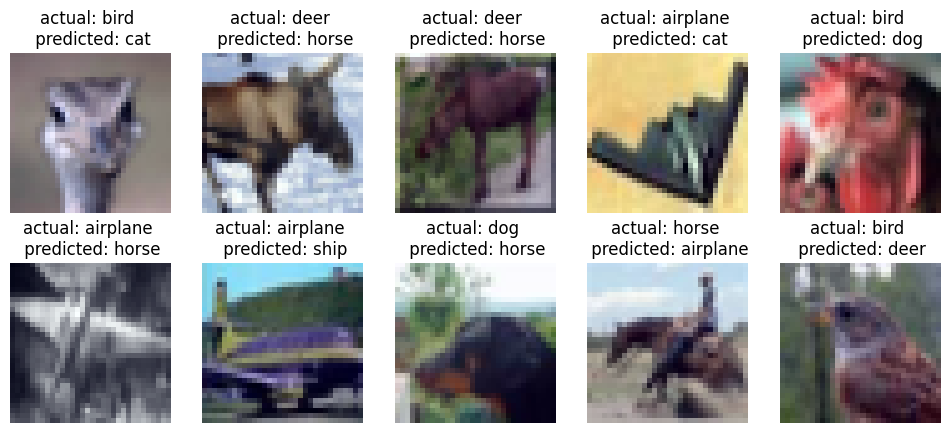

<Figure size 640x480 with 0 Axes>

In [421]:
import matplotlib.pyplot as plt

fig = plt.figure(figsize=(12, 5))

for i, row in df_misclassified.sample(n=10).reset_index(drop=True).iterrows():
    ax = plt.subplot(2, 5, i+1)
    plt.axis('off')

    img = row['data']
    img = (img - img.min()) / (img.max() - img.min())
    img = np.moveaxis(img * 255, [0, 1, 2], [2, 0, 1])
    plt.imshow(img.astype(int), cmap='jet')

    ax.set_title(f"actual: {labels[row['actual']]} \n predicted: {labels[row['pred']]}")

plt.show()
plt.savefig('failed_ln.jpg')

## Display Results

In [422]:
df = pd.DataFrame({'train_losses': metrics['train_losses'], 'test_losses': metrics['test_losses']})

In [423]:
df.plot()

In [424]:
df = pd.DataFrame({'train_acc': metrics['train_acc'], 'test_acc': metrics['test_acc']})
df.plot()